<a href="https://colab.research.google.com/github/dharapatel2908/Code-Clause---Data-Science/blob/main/TASK-2/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT']

tech_list = ['AAPL', 'GOOG', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT]
company_name = ["APPLE", "GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

com = pd.concat(company_list, axis=0)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
com.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-21,154.500000,155.570007,151.940002,155.350006,154.427887,65086600,APPLE
2022-07-22,155.389999,156.279999,153.410004,154.089996,153.175354,66675400,APPLE
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.042099,53623900,APPLE
2022-07-26,152.259995,153.089996,150.800003,151.600006,150.700150,55138700,APPLE
2022-07-27,152.580002,157.330002,152.160004,156.789993,155.859314,78620700,APPLE


In [ ]:
com.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-14,347.589996,351.429993,344.309998,345.239990,345.239990,28302200,MICROSOFT
2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900,MICROSOFT
2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700,MICROSOFT
2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900,MICROSOFT
2023-07-20,353.570007,357.970001,345.369995,346.869995,346.869995,33678000,MICROSOFT


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,157.481116,159.305379,155.918566,157.717410,157.334049,7.106913e+07
std,16.447577,16.268133,16.790190,16.573942,16.701644,2.297993e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.421100e+07
50%,154.009995,156.360001,152.679993,154.500000,153.826111,6.762210e+07
75%,169.389999,170.245003,167.349998,168.514999,168.242287,8.142645e+07
max,195.089996,198.229996,192.649994,195.100006,195.100006,1.647624e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-21 to 2023-07-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


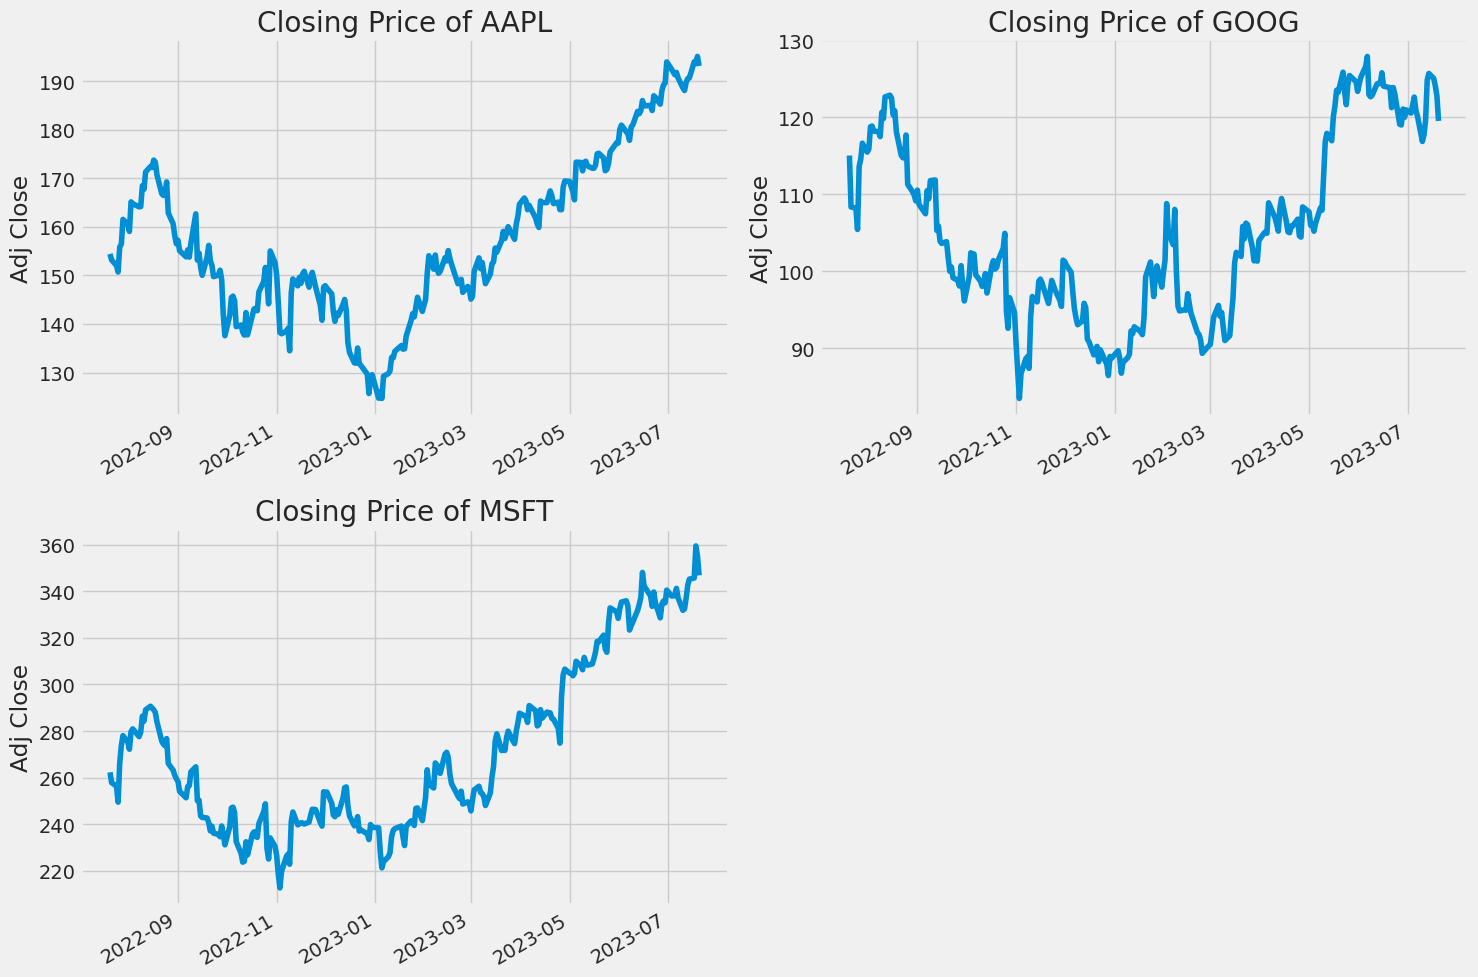

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

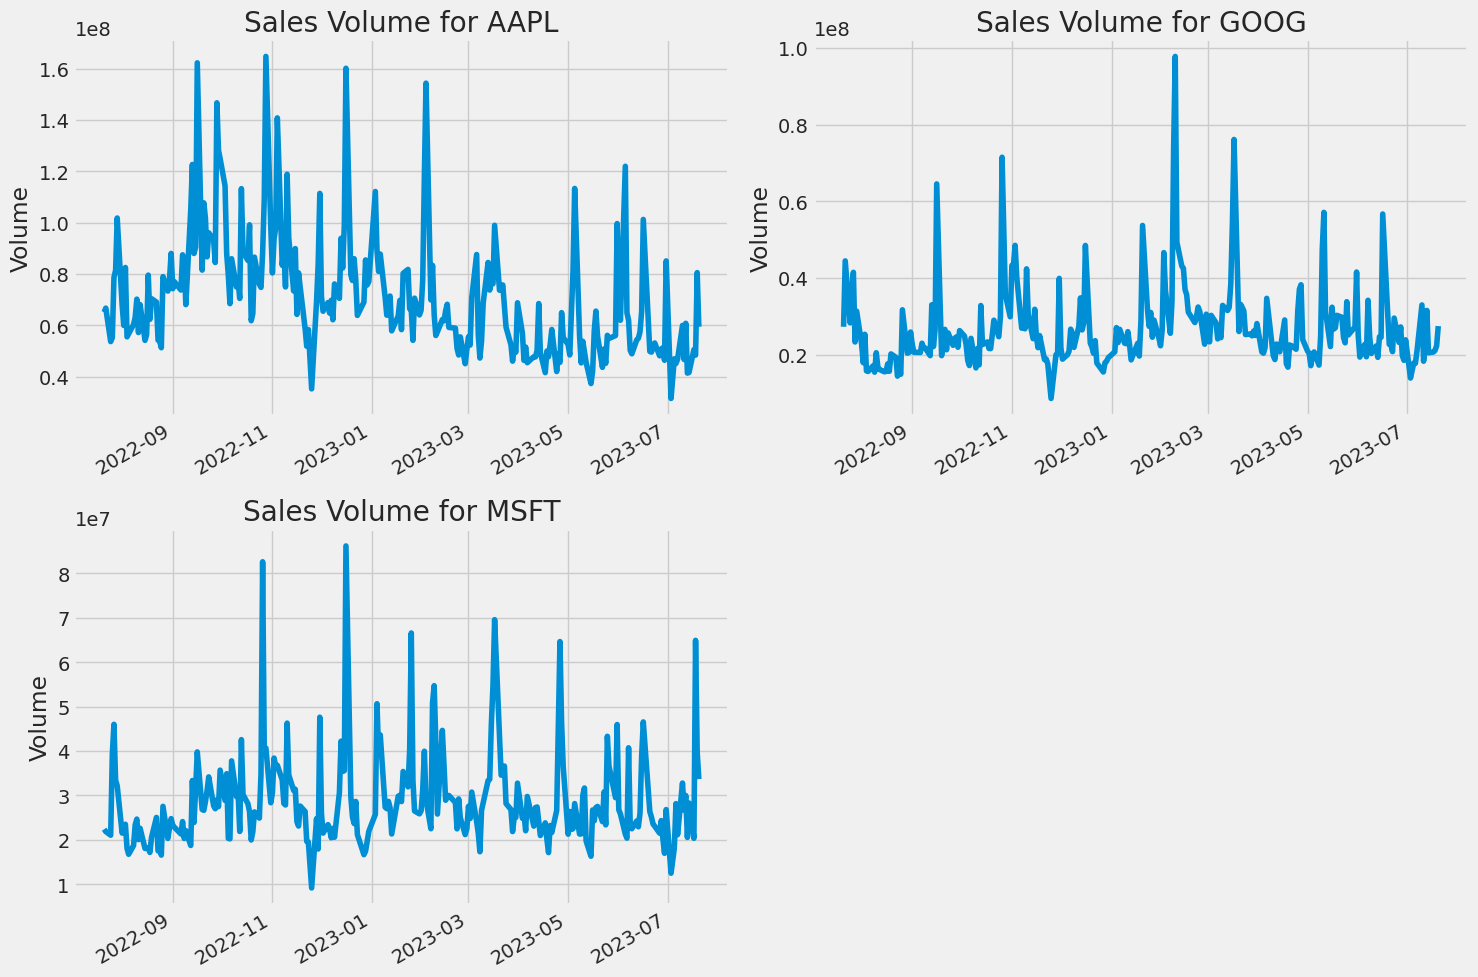

In [ ]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

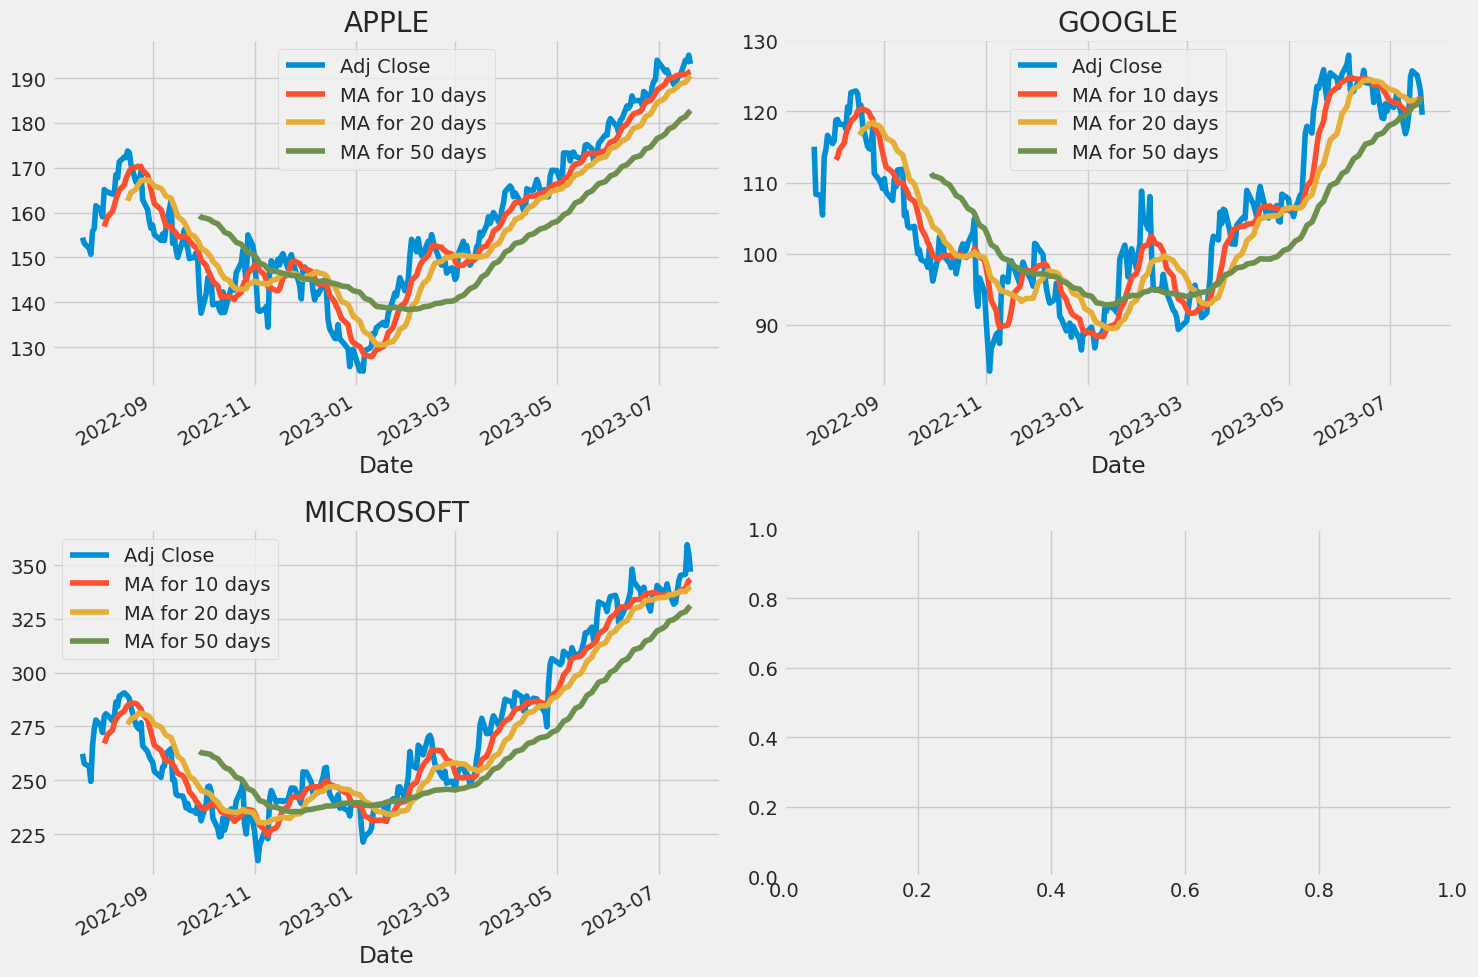

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

fig.tight_layout()

In [ ]:
# Get the stock quote
com = pdr.get_data_yahoo('AAPL', start='2021-07-01', end=datetime.now())
# Show tech data
com

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,136.600006,137.330002,135.759995,137.270004,135.680023,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,138.338867,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,140.375000,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,142.895493,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,141.580887,105575500
...,...,...,...,...,...,...
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200
2023-07-18,193.350006,194.330002,192.419998,193.729996,193.729996,48353800


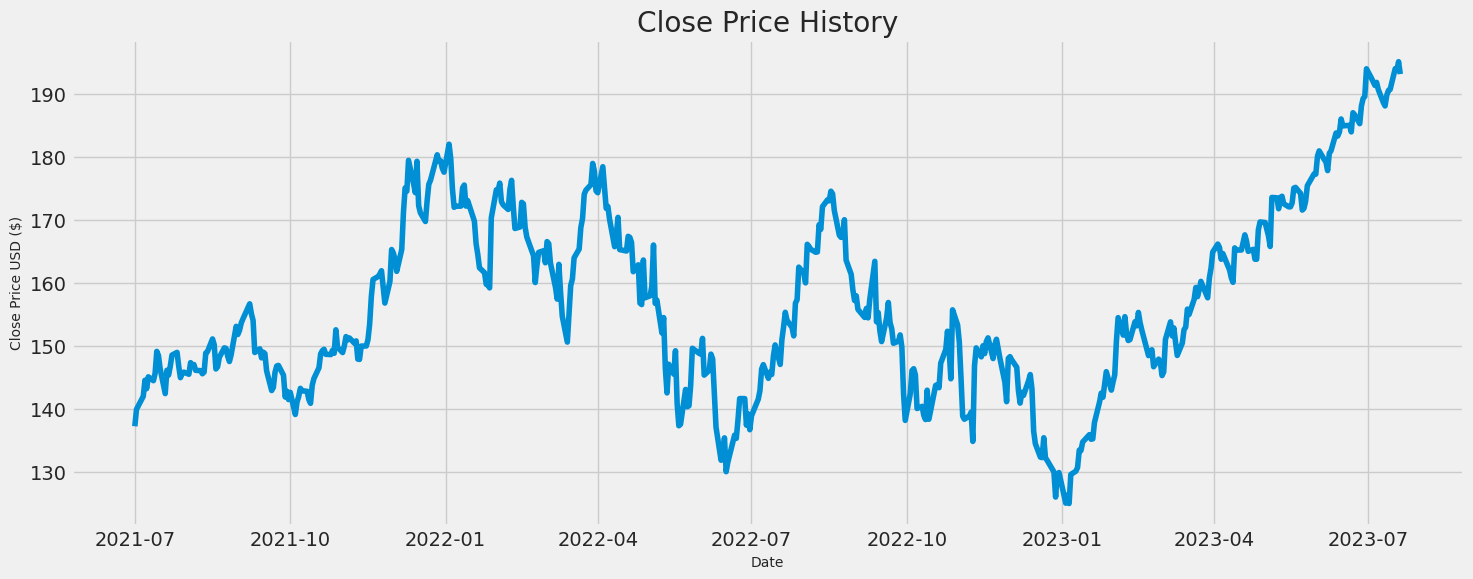

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(com['Close'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.show()

In [ ]:
data = com.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

491

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.74800314e-01],
       [2.13185046e-01],
       [2.42579985e-01],
       [2.78967010e-01],
       [2.59988676e-01],
       [2.86672392e-01],
       [2.77968047e-01],
       [2.94235159e-01],
       [3.44320691e-01],
       [3.34760216e-01],
       [3.04937213e-01],
       [2.48715724e-01],
       [3.01512477e-01],
       [2.90810424e-01],
       [3.10787721e-01],
       [3.35901794e-01],
       [3.42037751e-01],
       [3.10359656e-01],
       [2.84817300e-01],
       [2.94235159e-01],
       [2.97374446e-01],
       [2.92522900e-01],
       [3.18778552e-01],
       [3.12928044e-01],
       [3.14497688e-01],
       [3.01369862e-01],
       [3.00656348e-01],
       [2.93664479e-01],
       [2.97374446e-01],
       [3.40610724e-01],
       [3.43607395e-01],
       [3.72431435e-01],
       [3.59160993e-01],
       [3.04509148e-01],
       [3.09360693e-01],
       [3.30622184e-01],
       [3.52311740e-01],
       [3.51027328e-01],
       [3.33047957e-01],
       [3.21346941e-01],


In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.17480031, 0.21318505, 0.24257998, 0.27896701, 0.25998868,
       0.28667239, 0.27796805, 0.29423516, 0.34432069, 0.33476022,
       0.30493721, 0.24871572, 0.30151248, 0.29081042, 0.31078772,
       0.33590179, 0.34203775, 0.31035966, 0.2848173 , 0.29423516,
       0.29737445, 0.2925229 , 0.31877855, 0.31292804, 0.31449769,
       0.30136986, 0.30065635, 0.29366448, 0.29737445, 0.34061072,
       0.34360739, 0.37243143, 0.35916099, 0.30450915, 0.30936069,
       0.33062218, 0.35231174, 0.35102733, 0.33304796, 0.32134694,
       0.33647269, 0.40097024, 0.38256281, 0.3922659 , 0.40853301,
       0.41780825, 0.45191212, 0.42936644, 0.41452635, 0.3417523 ,
       0.35002858, 0.32962322, 0.34260843, 0.3391837 , 0.30022828,
       0.25570781, 0.26269968, 0.29723183, 0.31121579, 0.31249998])]
[0.290382359117773]

[array([0.17480031, 0.21318505, 0.24257998, 0.27896701, 0.25998868,
       0.28667239, 0.27796805, 0.29423516, 0.34432069, 0.33476022,
       0.30493721, 0.24871572, 0.3015

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

431/431 [==============================] - 20s 38ms/step - loss: 0.0093


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


4.6603572019355015

<ipython-input-53-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


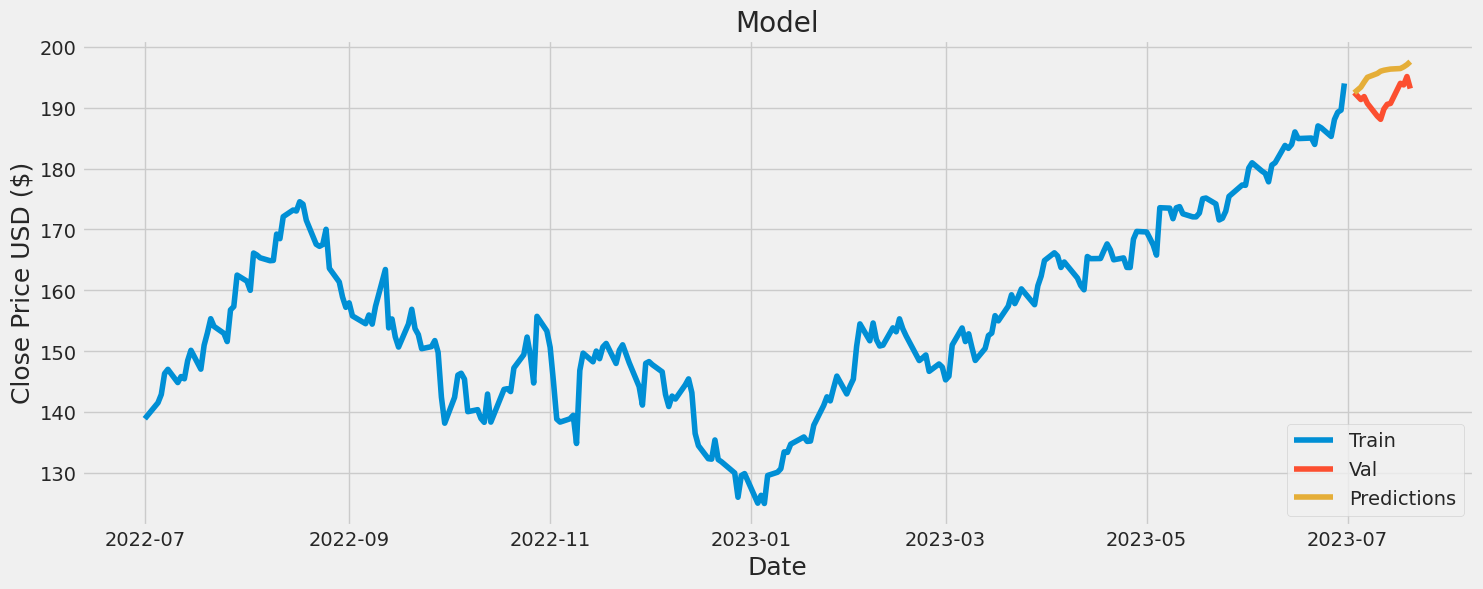

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2023-07-03,192.460007,192.434708
2023-07-05,191.330002,193.361893
2023-07-06,191.809998,194.204575
2023-07-07,190.679993,194.979691
2023-07-10,188.610001,195.602493
2023-07-11,188.080002,195.975662
2023-07-12,189.770004,196.135284
2023-07-13,190.539993,196.236633
2023-07-14,190.690002,196.329391
